In [1]:
from olgmodel import OLGModel
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from collections import namedtuple
history_R = []  # 紀錄歷史均衡利率
history_K = []  # 紀錄歷史均衡資本


均衡利率: 0.5392 均衡資本: 0.6079252466582156


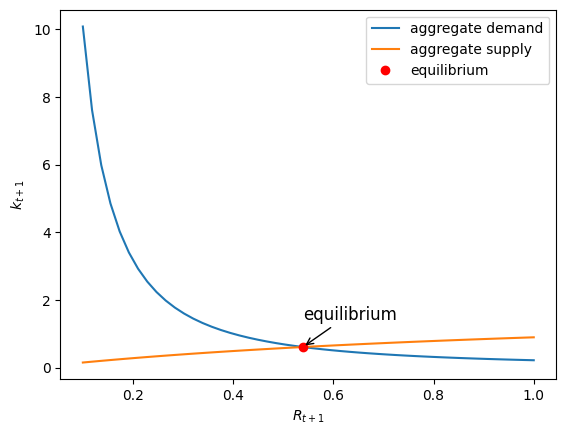

c_t = 1.3920286869271803
c_t+1 = 0.32781813200886445


([0.6079252466582156], [0.5392])

In [8]:
### 求解最適資本和利率
def crra(c, θ):
    return c**(1 - θ) / (1 - θ)

Model = namedtuple('Model', ['α', 'β', 'θ'])

def create_olg_model(α=0.4, β=0.9, θ=0.5):
    return Model(α=α, β=β, θ=θ)

def capital_demand(R, model):
    return (model.α/R)**(1/(1-model.α))

def savings_crra(w, R, model):
    return w / (1 + model.β**(-1/model.θ) * R**((model.θ-1)/model.θ))

R_vals = np.linspace(0.1, 1)
model = create_olg_model()
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, model), 
        label="aggregate demand")
ax.plot(R_vals, savings_crra(w, R_vals, model), 
        label="aggregate supply")

tolerance = 0.0001  

equilibrium_R = 0
equilibrium_k = 0
for R_val in np.arange(0.0001, 0.9999, 0.0001):
    demand_value = capital_demand(R_val, model)
    supply_value = savings_crra(w, R_val, model)
    
    if np.abs(demand_value - supply_value) <= tolerance:
        equilibrium_R = R_val
        equilibrium_k = demand_value
        print("均衡利率:", equilibrium_R, "均衡資本:", equilibrium_k)
        break

if equilibrium_R is not None:
    # 繪製均衡點
    ax.plot(equilibrium_R, equilibrium_k, 'ro', label="equilibrium")

    # 標記均衡點
    ax.annotate(r'equilibrium',
                xy=(equilibrium_R, equilibrium_k),
                xycoords='data',
                xytext=(0, 20),
                textcoords='offset points',
                fontsize=12,
                arrowprops=dict(arrowstyle="->"))

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

history_R.append(equilibrium_R)
history_K.append(equilibrium_k)
print(f"c_t = {w-supply_value}")
print(f"c_t+1 = {supply_value*equilibrium_R}")
history_K,history_R

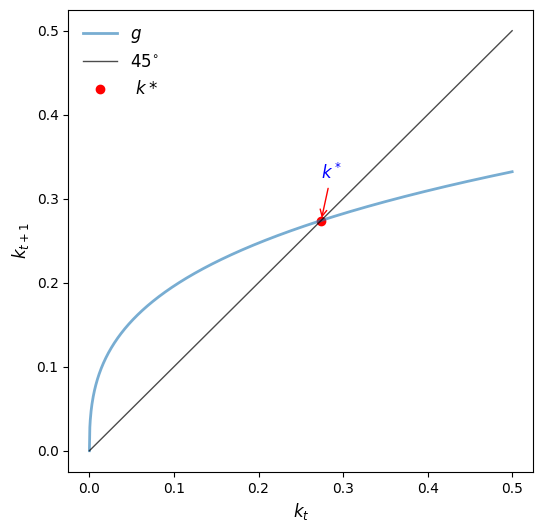

k* = 0.27405702874281945
y* = 0.5958492238368149


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

class OLGModel:
    def __init__(self, α, β, θ):
        self.α = α
        self.β = β
        self.θ = θ

def f(k_prime, k, model):
    α, β, θ = model.α, model.β, model.θ
    z = (1 - α) * k**α
    a = α**(1-1/θ)
    b = k_prime**((α * θ - α + 1) / θ)
    p = k_prime + k_prime * β**(-1/θ) * a * b
    return p - z

def k_update(k, model):
    return optimize.newton(lambda k_prime: f(k_prime, k, model), 0.1)

def h(k_star, model):
    α, β, θ = model.α, model.β, model.θ
    z = (1 - α) * k_star**α
    R1 = α ** (1-1/θ)
    R2 = k_star**((α * θ - α + 1) / θ)
    p = k_star + k_star * β**(-1/θ) * R1 * R2
    return p - z

# 定義參數
α, β, θ = 0.4, 0.9, 1

kmin, kmax = 0, 0.5
x = 1000
k_grid = np.linspace(kmin, kmax, x)
k_grid_next = np.empty_like(k_grid)

# 創建OLGMODEL
model = OLGModel(α, β, θ)

# 計算下一期資本存量
for i in range(x):
    k_grid_next[i] = k_update(k_grid[i], model)

# 繪製圖形
fig, ax = plt.subplots(figsize=(6, 6))
ymin, ymax = np.min(k_grid_next), np.max(k_grid_next)

# 繪製 k_{t+1} vs. k_t
ax.plot(k_grid, k_grid_next,  lw=2, alpha=0.6, label='$g$')
# 繪製 45 度線
ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')

# 標記均衡點
k_star = optimize.newton(h, 0.2, args=(model,))
ax.scatter(k_star, k_star, color='red', marker='o', label=' $k*$')
arrow_text = "$k^*$"
ax.annotate(arrow_text,
            xy=(k_star, k_star),
            xycoords='data',
            xytext=(0, 30),  # 箭頭的位置
            textcoords='offset points',
            fontsize=12,
            color='blue',  # 箭頭的顏色
            arrowprops=dict(arrowstyle="->", color='RED'))
# 圖例和軸標籤
ax.legend(loc='upper left', frameon=False, fontsize=12)
ax.set_xlabel('$k_t$', fontsize=12)
ax.set_ylabel('$k_{t+1}$', fontsize=12)


plt.show()

print(f"k* = {k_star}")
print(f"y* = {k_star**α}")


In [1]:
import matplotlib.pyplot as plt
from olgmodel import OLGModel
import numpy as np
from scipy import optimize
from collections import namedtuple
# 創造模型
model = OLGModel()
# 假設工資水平=2
wage = 2.0

均衡利率: 0.5392 均衡資本: 0.6079252466582156


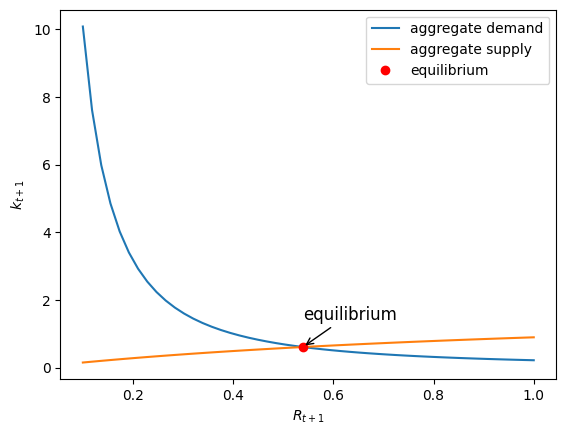

c_t = 1.3920286869271803
c_t+1 = 0.32781813200886445
History_R: [0.5392, 0.5392] & History_K: [0.6079252466582156, 0.6079252466582156]


In [3]:
# 尋找均衡
equilibrium_R, equilibrium_k = model.find_equilibrium(wage)

# PRINT結果
supply_value = model.savings_crra(wage, equilibrium_R)
print(f"c_t = {wage - supply_value}")
print(f"c_t+1 = {supply_value * equilibrium_R}")
print(f"History_R: {model.history_R} & History_K: {model.history_K}")

In [1]:
import numpy as np
from olgmodel1 import OLGModel
# 定義參數
α, β, θ = 0.6, 0.9, 1

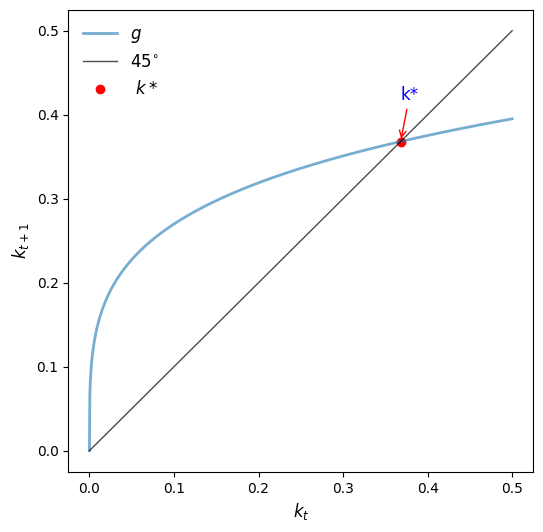

k* = 0.3681093933746328
y* = 0.11043281801238983


In [3]:
#創造模型
model = OLGModel(α, β, θ)
model.α=0.3
# 畫出k*
model.plot_dynamics(0, 0.5)